wmmse             240.366848
wmmse_local       200.900293
wmmse_sc          269.646904
wmmse_ci           14.352696
wmmse_local_ci     12.495301
wmmse_sc_ci        18.749514
Name: 499, dtype: float64


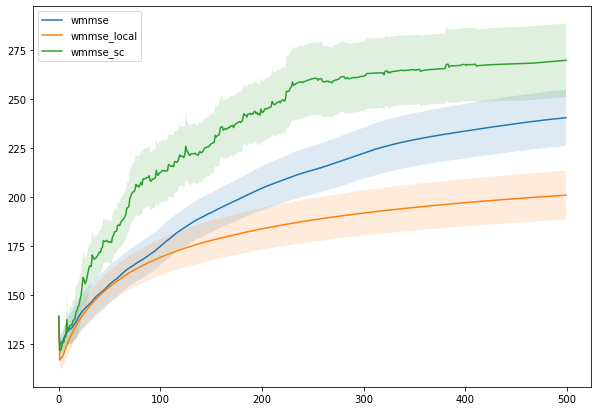

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('data/dependent_dependent_iter50_txA5_txB5.csv')
data_grouped = data.groupby('iteration').agg(['mean', 'std', 'count'])
data_export = data.groupby('iteration').mean()
column_names = data_grouped.droplevel(axis=1, level=1).columns.unique().tolist()
for col in column_names:
    mean = data_grouped[col, 'mean']
    std = data_grouped[col, 'std']
    count = np.sqrt(data_grouped[col, 'count'])

    ci =  1.64 * std / count 
    ci_lower = mean - ci
    ci_upper = mean + ci
    mean = data_grouped[col, 'mean']

    data_export[col+'_ci'] = ci

_, ax = plt.subplots(1,1,figsize=(10,7))
for col in column_names:
    x = data_export.index
    y = data_export[col]
    ax.plot(x, y, label=col);
    ax.fill_between(
        x, data_export[col]-data_export[col+'_ci'], data_export[col]+data_export[col+'_ci'], alpha=.15
    );
    ax.legend();

data_export.to_csv('export.csv', sep='\t')

print(data_export.loc[499])